In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(0)
random.seed(0)




# Q1 (b)

In [2]:
def calculate_loss(X, y, theta):
    """
    Calculate the cross-entropy loss function given X, y, and theta
    """
    f_x = X.dot(theta)
    y_probs = 1 / (1 + np.exp(-f_x))



    #TODO: Implement loss calculation here

    loss = -y*np.log(y_probs) - (1-y)*(np.log(1-y_probs))

    #m = len(y)  # number of samples
    #calculate loss as average loss across all samples
    #loss = np.sum(loss) / m
    loss = np.sum(loss)

    return loss


def calculate_grad(X, y, theta):
    """
    Calculate the gradient of the cross-entropy loss w.r.t. theta
    """
    f_x = X.dot(theta)
    y_probs = 1 / (1 + np.exp(-f_x))



    #TODO: Implement loss calculation here

    #Doing batch gradient descent (using whole training dataset and averaging gradients for each data tuple x1,x2)

    errors_matrix = y_probs - y
    x1_column = X[:,1]
    x2_column = X[:,2]
    dL_dtheta0 = errors_matrix
    dL_dtheta1 = errors_matrix* x1_column
    dL_dtheta2 = errors_matrix* x2_column


    summed_dL_dtheta0 = np.sum(dL_dtheta0, axis=0)
    summed_dL_dtheta1 = np.sum(dL_dtheta1, axis=0)
    summed_dL_dtheta2 = np.sum(dL_dtheta2, axis=0)

    theta_grad = np.array([summed_dL_dtheta0, summed_dL_dtheta1, summed_dL_dtheta2])


    return theta_grad


def has_converged(loss, new_loss):
    """
    Check if the model has converged and loss remains stable.
    """
    return abs(loss - new_loss) < 0.000001


def calculate_new_theta(theta, theta_grad, alpha):
    """
    Calculate the updated theta based on theta, gradient of theta, and step size
    """
    return theta - alpha * theta_grad


In [3]:
# Please load load X and y in training set


#TODO: Initialize Data.
x0 = np.array([1,1,1,1,1,1,1,1])
x1 = np.array([2.35, 2.15, 2.09, 2.78, 3.02, 2.44, 2.87, 2.18])
x2 = np.array([1.87, 2.01, 1.42, 2.32, 0.98, 0.75, 0.68, 0.92])
X = np.column_stack((x0,x1, x2))
y = np.array([0,0,0,0,1,1,1,1])



# Initialize parameter and hyperparameters
loss = float('inf')
new_loss = float('inf')
new_theta = np.array([float('inf'), float('inf'), float('inf')])


#TODO: Initlizae theta and alpha
theta = np.array([-1, -1.5, 0.5])
alpha = 0.1


iters = 0

# Perform Logistic Regression
while not has_converged(loss, new_loss):
  loss = new_loss
  theta_grad = calculate_grad(X, y, theta)
  #print("theta_grad: " + str(theta_grad))
  new_theta = calculate_new_theta(theta, theta_grad, alpha)
  #print("new theta: " + str(new_theta))
  new_loss = calculate_loss(X, y, new_theta)
  #print("new loss: " + str(new_loss))
  theta = new_theta
  iters += 1

  # Uncomment the following line to print the loss at each step (for debugging purpose)
  print(f"New Theta: {new_theta}, New Loss: {new_loss}, Iteration {iters}")
print(f"Final Theta: {theta}, Loss: {calculate_loss(X, y, theta)}, Total Iterations: {iters}")

A saída de streaming foi truncada nas últimas 5000 linhas.
New Theta: [  1.43961597   8.45719854 -16.6858441 ], New Loss: 0.021136320342614194, Iteration 7534
New Theta: [  1.43967538   8.4574225  -16.68630375], New Loss: 0.021133670810992915, Iteration 7535
New Theta: [  1.43973478   8.45764644 -16.68676335], New Loss: 0.021131021946629584, Iteration 7536
New Theta: [  1.43979418   8.45787035 -16.68722289], New Loss: 0.021128373749271772, Iteration 7537
New Theta: [  1.43985356   8.45809423 -16.68768236], New Loss: 0.021125726218666496, Iteration 7538
New Theta: [  1.43991294   8.45831808 -16.68814179], New Loss: 0.021123079354560106, Iteration 7539
New Theta: [  1.43997231   8.4585419  -16.68860115], New Loss: 0.02112043315670107, Iteration 7540
New Theta: [  1.44003168   8.4587657  -16.68906045], New Loss: 0.021117787624837084, Iteration 7541
New Theta: [  1.44009103   8.45898946 -16.6895197 ], New Loss: 0.021115142758714837, Iteration 7542
New Theta: [  1.44015038   8.4592132  -16.

# Q1 (c)

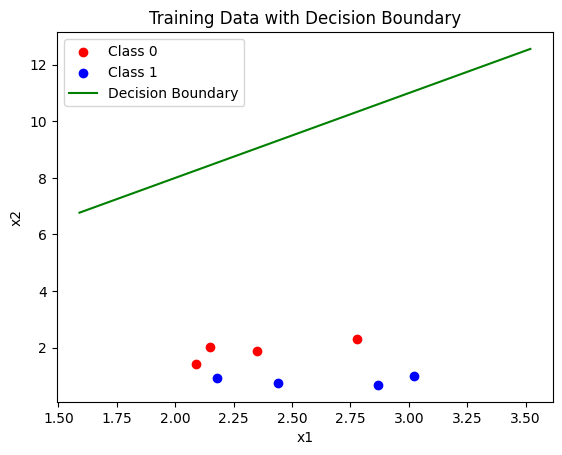

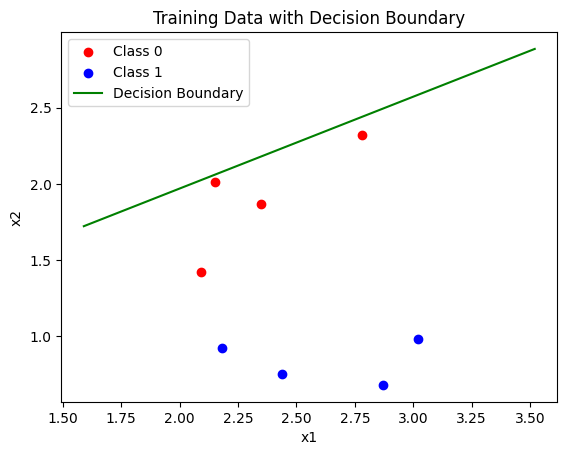

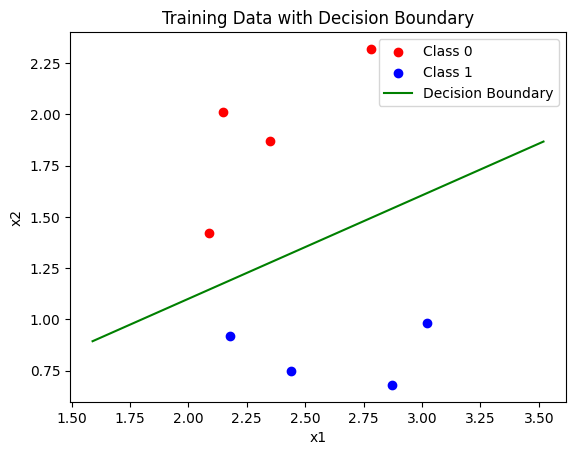

In [4]:
'''
TODO: fill in theta after one iteration, and theta after convergence.
'''
theta_init = [-1.0, -1.5, 0.5]
theta_1 = [-0.61632272, -0.48708145,  0.80753296]
theta_final = [1.67066, 9.32557, -18.46849 ]

for theta in [theta_init, theta_1, theta_final]:
    '''
    TODO: Plot the training data scatter plot, truth labels, and model's decision boundary hyperplane on the same plot.
    '''
    #plot with theta after one iteration
    # Scatter plot of the data
    plt.scatter(X[y==0, 1], X[y==0, 2], color='red', label='Class 0')  # Class 0 in red
    plt.scatter(X[y==1, 1], X[y==1, 2], color='blue', label='Class 1')  # Class 1 in blue
    # Decision boundary
    x1_values = np.linspace(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)
    x2_values = - (theta[0] + theta[1] * x1_values) / theta[2]
    plt.plot(x1_values, x2_values, 'g-', label='Decision Boundary')
    # Labels and legend
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Training Data with Decision Boundary')
    plt.show()

    #plot with theta after convergence

# Q1 (d)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:

#TODO: Initialize and load the training data.
#x0 = np.array([1,1,1,1,1,1,1,1])
x1 = np.array([2.35, 2.15, 2.09, 2.78, 3.02, 2.44, 2.87, 2.18])
x2 = np.array([1.87, 2.01, 1.42, 2.32, 0.98, 0.75, 0.68, 0.92])
X = np.column_stack((x1, x2))
y = np.array([0,0,0,0,1,1,1,1])

Theta 0 (Intercept): 0.7904966941343069
Theta 1: 0.3863544106917627
Theta 2: -1.2830609119982568


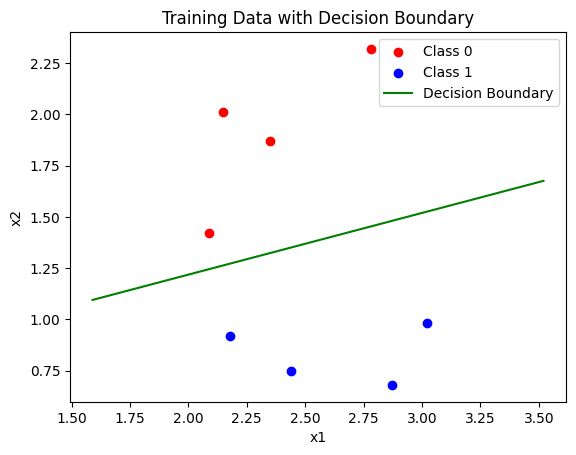

In [7]:
# Final Solution
model = LogisticRegression()
model.fit(X,y)
'''
TODO: Implement logitic regression using function LogisticRegression in sklearn and print the optimized coefficient after convergence.

Hint 1: Setting a large max_iter to ensure convergence.

'''
theta_0 = model.intercept_[0]
theta_1 = model.coef_[0, 0]
theta_2 = model.coef_[0, 1]

print("Theta 0 (Intercept):", theta_0)
print("Theta 1:", theta_1)
print("Theta 2:", theta_2)

#plot with theta after one iteration
# Scatter plot of the data
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')  # Class 0 in red
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')  # Class 1 in blue
# Decision boundary
x1_values = np.linspace(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
x2_values = - (theta_0 + theta_1 * x1_values) / theta_2
plt.plot(x1_values, x2_values, 'g-', label='Decision Boundary')
# Labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Training Data with Decision Boundary')
plt.show()

# Q1 (e)

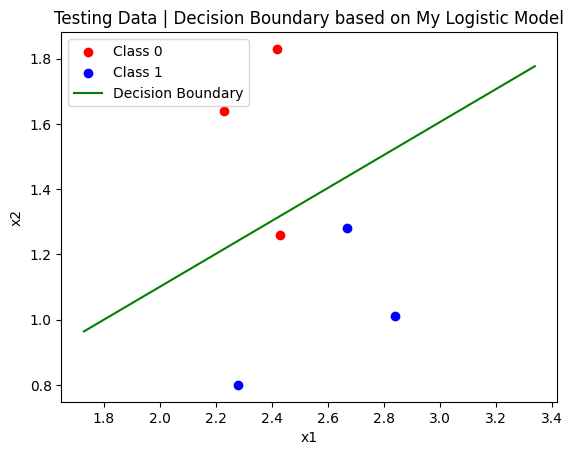

In [8]:
'''
TODO: Compare your model with sklearn's model and report accuracy, precision, recall of both models.
'''
x0 = np.array([1,1,1,1,1,1])
x1 = np.array([2.23, 2.42, 2.43, 2.67, 2.28, 2.84])
x2 = np.array([1.64, 1.83, 1.26, 1.28, 0.8, 1.01])
X = np.column_stack((x0, x1, x2))
y = np.array([0,0,0,1,1,1])

theta_my_method = [1.67066, 9.32557, -18.46849 ]
'''
TODO: Plot the training data scatter plot, truth labels, and model's decision boundary hyperplane on the same plot.
'''
#plot with theta using my method
# Scatter plot of the data
plt.scatter(X[y==0, 1], X[y==0, 2], color='red', label='Class 0')  # Class 0 in red
plt.scatter(X[y==1, 1], X[y==1, 2], color='blue', label='Class 1')  # Class 1 in blue
# Decision boundary
x1_values = np.linspace(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)
x2_values = - (theta_my_method[0] + theta_my_method[1] * x1_values) / theta_my_method[2]
plt.plot(x1_values, x2_values, 'g-', label='Decision Boundary')
# Labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Testing Data | Decision Boundary based on My Logistic Model')
plt.show()

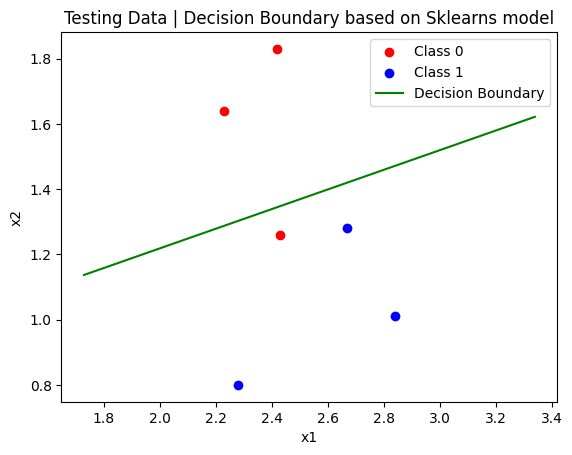

In [9]:
#plot with theta trained using sklearn

x1 = np.array([2.23, 2.42, 2.43, 2.67, 2.28, 2.84])
x2 = np.array([1.64, 1.83, 1.26, 1.28, 0.80, 1.01])
X = np.column_stack((x1, x2))
y = np.array([0,0,0,1,1,1])

# Scatter plot of the data
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')  # Class 0 in red
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')  # Class 1 in blue
# Decision boundary
x1_values = np.linspace(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
x2_values = - (theta_0 + theta_1 * x1_values) / theta_2
plt.plot(x1_values, x2_values, 'g-', label='Decision Boundary')
# Labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Testing Data | Decision Boundary based on Sklearns model')
plt.show()


